In [773]:
library('magrittr')

In [774]:
library('broom')

In [775]:
library('dplyr')

In [776]:
inputData <- read.csv("NHLTop100.csv")

In [777]:
head(inputData)

,Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [778]:
inputData <- inputData %>% select(Player,G,A) %>% na.omit()

In [779]:
nrow(inputData)

[1] 100

In [780]:
model <- lm(A ~ G, data=inputData)
model


Call:
lm(formula = A ~ G, data = inputData)

Coefficients:
(Intercept)            G  
   494.5135       0.5202  


In [781]:
coefs <- coef(model)
coefs[2]

G 
0.5202063

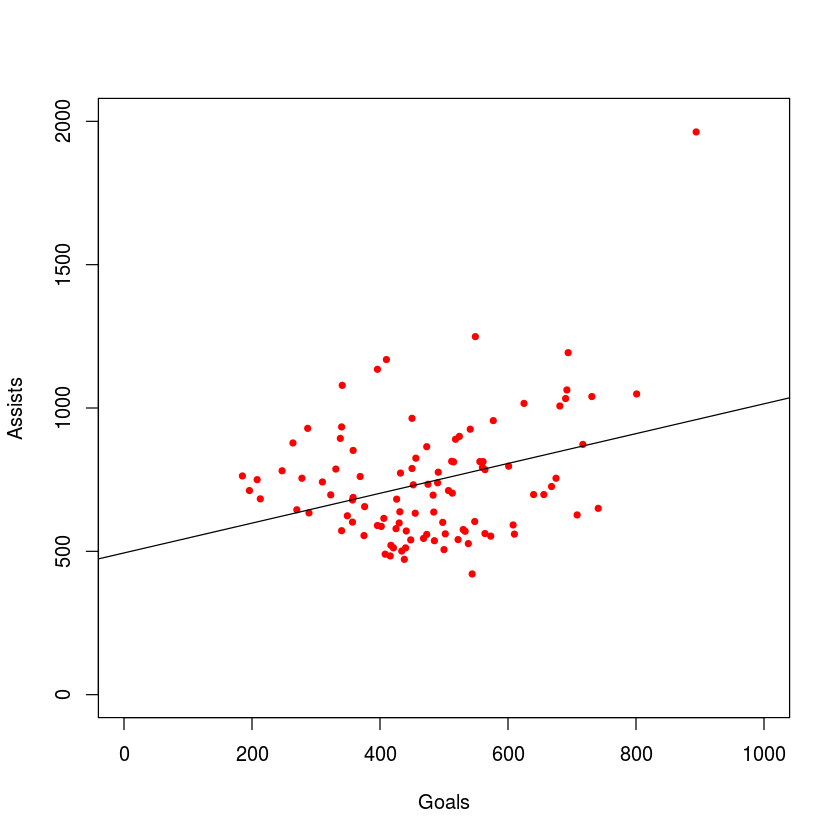

In [782]:
plot(inputData$A ~ inputData$G, pch=20,col='red',xlab="Goals",ylab="Assists",xlim=c(0,1000),ylim=c(0,2000))
abline(coefs[1],coefs[2])

In [783]:
names(summary(model))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [784]:
summary(model)


Call:
lm(formula = A ~ G, data = inputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [785]:
glance(model)$r.squared

[1] 0.1082305

In [786]:
glance(model)$p.value

[1] 0.0008317169

# Change the model so that it line is forced through Wayne Gretzky. Note the R2 and p values of the fit. This will another line or if you prefer another plot.

In [787]:
wgX <- as.numeric(inputData %>% select(G) %>% filter(inputData$Player=='Wayne Gretzky'))
wgY <- as.numeric(inputData %>% select(A) %>% filter(inputData$Player=='Wayne Gretzky'))

In [788]:
shiftedModel <- lm(I(A-wgY) ~ I(G-wgX) + 0, data=inputData)

In [789]:
shiftedModel


Call:
lm(formula = I(A - wgY) ~ I(G - wgX) + 0, data = inputData)

Coefficients:
I(G - wgX)  
     2.685  


In [790]:
coefs1 <- coef(shiftedModel)

In [791]:
coef(shiftedModel)

I(G - wgX) 
  2.684662

In [792]:
summary(shiftedModel)


Call:
lm(formula = I(A - wgY) ~ I(G - wgX) + 0, data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - wgX)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


I(G - wgX) 
  2.684662

I(G - wgX) 
 -437.0882

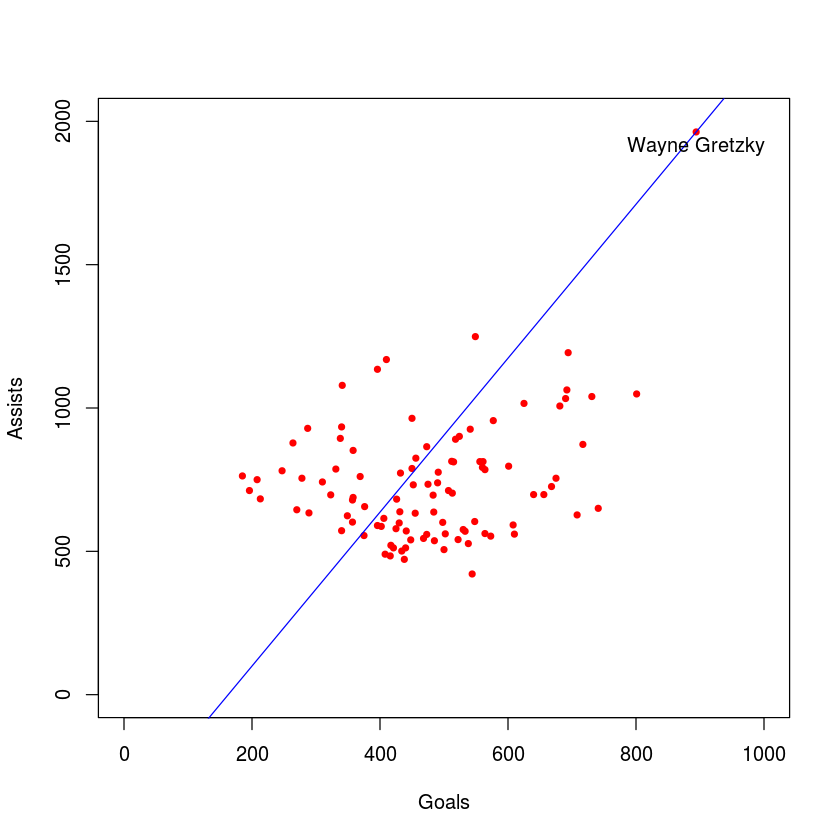

In [793]:
plot(inputData$A ~ inputData$G, pch=20,col='red',xlab="Goals",ylab="Assists",xlim=c(0,1000),ylim=c(0,2000))
#abline(coefs[1],coefs[2],col='red')
shiftedModel <- lm(I(A-wgY) ~ I(G-wgX)+0,data=inputData)
slopeShiftedModel <- coef(shiftedModel)
slopeShiftedModel
interceptShiftedModel <- wgY-(slopeShiftedModel*wgX)
interceptShiftedModel
abline(interceptShiftedModel,slopeShiftedModel,col='blue')
with(subset(inputData,Player=="Wayne Gretzky"),text(wgX,wgY-50,'Wayne Gretzky'))

# Now add the data for another player Patrick Kane (he is a current player). You need to get the data for form online sources. Create a new chart with this addition and force the line through Kane but not Gretzky. Note R2 and p values of the fit.

Data taken from: http://www.hockeydb.com/ihdb/stats/pdisplay.php?pid=96554

In [794]:
library(plyr)

In [795]:
newDataFrame <- data.frame('Patrick Kane',285,465)
newDataFrame <- rename(newDataFrame,c("X.Patrick.Kane."="Player", "X285"="G","X465"="A"))

In [796]:
head(inputData)
head(newDataFrame)

,Player,G,A
1,Wayne Gretzky,894,1963
2,Mark Messier,694,1193
3,Gordie Howe,801,1049
4,Ron Francis,549,1249
5,Marcel Dionne,731,1040
6,Steve Yzerman,692,1063


,Player,G,A
1,Patrick Kane,285,465


In [797]:
modifiedInputData <- rbind(inputData,newDataFrame)

In [798]:
nrow(modifiedInputData)

[1] 101

In [799]:
wgX <- as.numeric(modifiedInputData %>% select(G) %>% filter(modifiedInputData$Player=='Patrick Kane'))
wgY <- as.numeric(modifiedInputData %>% select(A) %>% filter(modifiedInputData$Player=='Patrick Kane'))

In [800]:
shiftedModel1 <- lm(I(A-wgY) ~ I(G-wgX) + 0, data=modifiedInputData)

In [801]:
shiftedModel1


Call:
lm(formula = I(A - wgY) ~ I(G - wgX) + 0, data = modifiedInputData)

Coefficients:
I(G - wgX)  
     1.135  


In [802]:
coefs1 <- coef(shiftedModel1)

In [803]:
coef(shiftedModel1)

I(G - wgX) 
  1.134565

In [804]:
summary(shiftedModel1)


Call:
lm(formula = I(A - wgY) ~ I(G - wgX) + 0, data = modifiedInputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -114.55   40.53  165.99  807.05 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - wgX)   1.1346     0.0979   11.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 229.8 on 100 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 134.3 on 1 and 100 DF,  p-value: < 2.2e-16


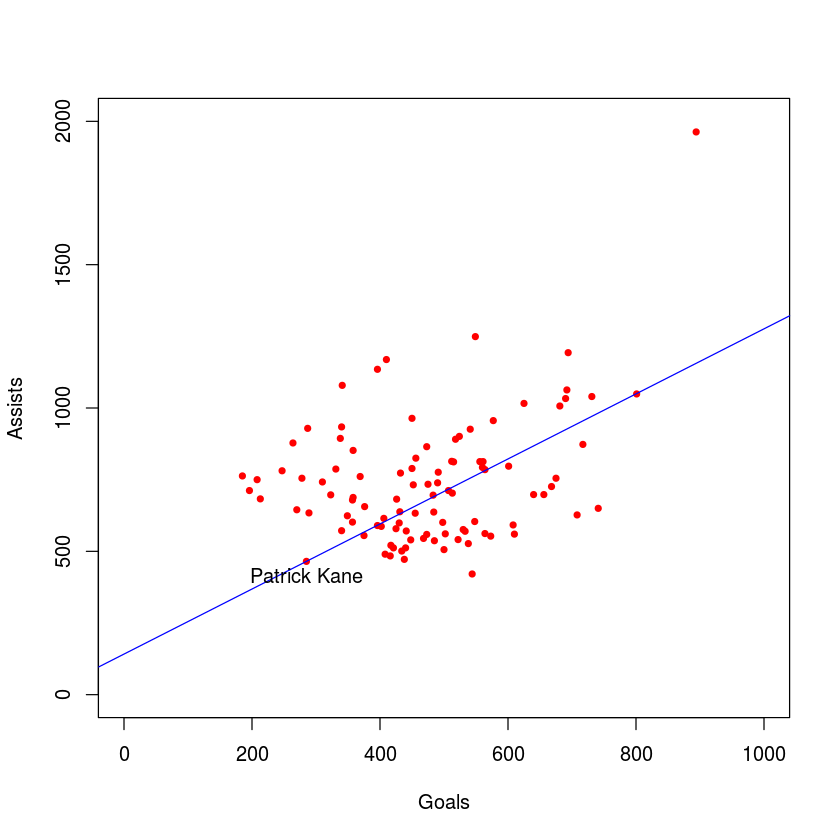

In [805]:
plot(modifiedInputData$A ~ modifiedInputData$G, pch=20,col='red',xlab="Goals",ylab="Assists",xlim=c(0,1000),ylim=c(0,2000))
#abline(coefs[1],coefs[2],col='red')
#shiftedModel1 <- lm(I(A-wgY) ~ I(G-wgX)+0,data=modifiedInputData)
slopeShiftedModel1 <- coef(shiftedModel1)
interceptShiftedModel1 <- wgY-(slopeShiftedModel1*wgX)
abline(interceptShiftedModel1,slopeShiftedModel1,col='blue')
with(subset(modifiedInputData,Player=="Patrick Kane"),text(wgX,wgY-50,"Patrick Kane"))

In [806]:
glance(shiftedModel1)$r.squared
glance(shiftedModel1)$p.value

[1] 0.5731817

[1] 3.394245e-20

# Make all the model go through (0,0) and create new models. Note R2 and p values of the fit.


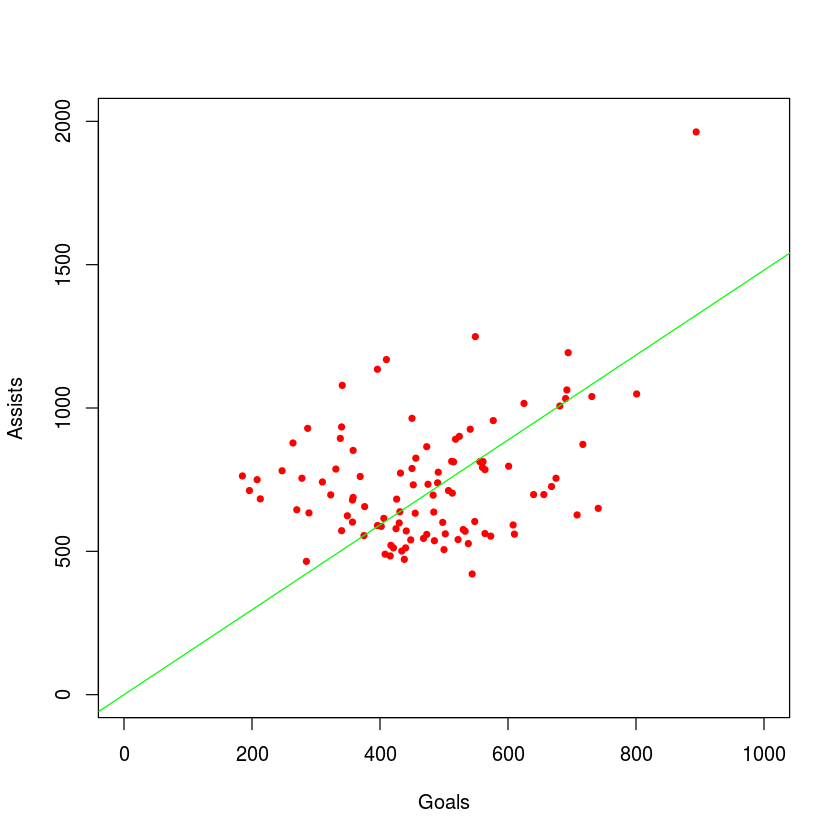

In [807]:
plot(modifiedInputData$A ~ modifiedInputData$G, pch=20,col='red',xlab="Goals",ylab="Assists",xlim=c(0,1000),ylim=c(0,2000))
modelO <- lm(I(A-0) ~ I(G)+0, data=modifiedInputData)
coefs <- coef(modelO)
abline(0,coefs[1],col='green')

In [808]:
wgX <- as.numeric(modifiedInputData %>% select(G) %>% filter(modifiedInputData$Player=='Wayne Gretzky'))
wgY <- as.numeric(modifiedInputData %>% select(A) %>% filter(modifiedInputData$Player=='Wayne Gretzky'))

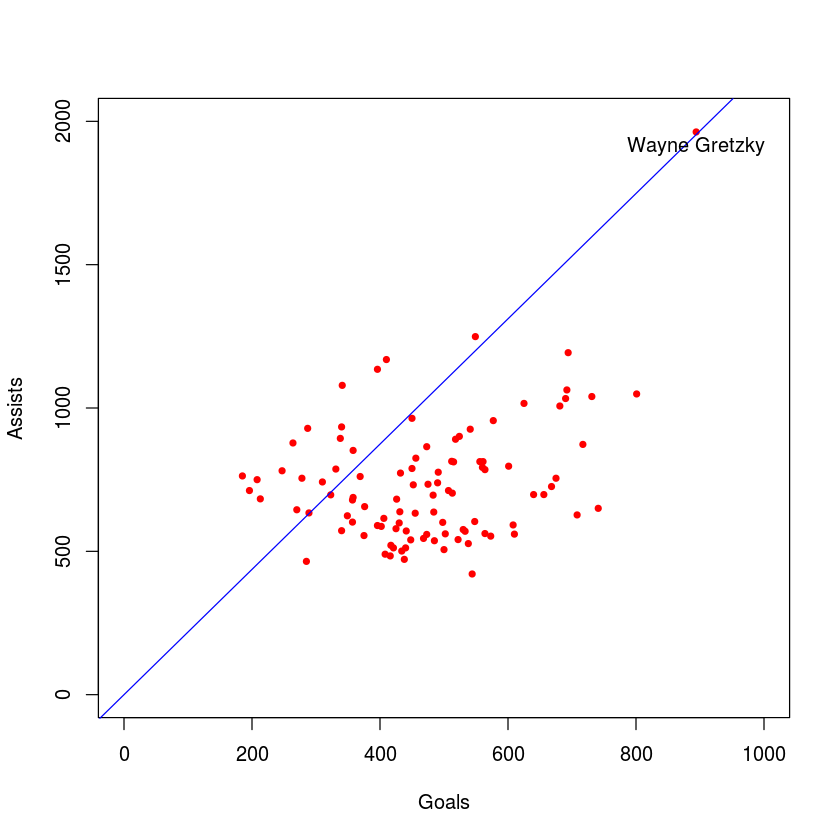

In [809]:
plot(modifiedInputData$A ~ modifiedInputData$G, pch=20,col='red',xlab="Goals",ylab="Assists",xlim=c(0,1000),ylim=c(0,2000))
shiftedModelO <- lm(I(A-0) ~ I(G-185)+0,data=modifiedInputData)
coefs <- coef(shiftedModelO)
abline(0,coefs[1],col='blue')
with(subset(modifiedInputData,Player=="Wayne Gretzky"),text(wgX,wgY-50,"Wayne Gretzky"))

In [810]:
summary(shiftedModelO)


Call:
lm(formula = I(A - 0) ~ I(G - 185) + 0, data = modifiedInputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-565.03  -76.91   72.48  265.61  763.00 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 185)   2.1853     0.1015   21.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 326.1 on 100 degrees of freedom
Multiple R-squared:  0.8226,	Adjusted R-squared:  0.8209 
F-statistic: 463.8 on 1 and 100 DF,  p-value: < 2.2e-16


In [811]:
wgX <- as.numeric(modifiedInputData %>% select(G) %>% filter(modifiedInputData$Player=='Patrick Kane'))
wgY <- as.numeric(modifiedInputData %>% select(A) %>% filter(modifiedInputData$Player=='Patrick Kane'))

I(G - 50) 
  1.62936

[1] 1.631579

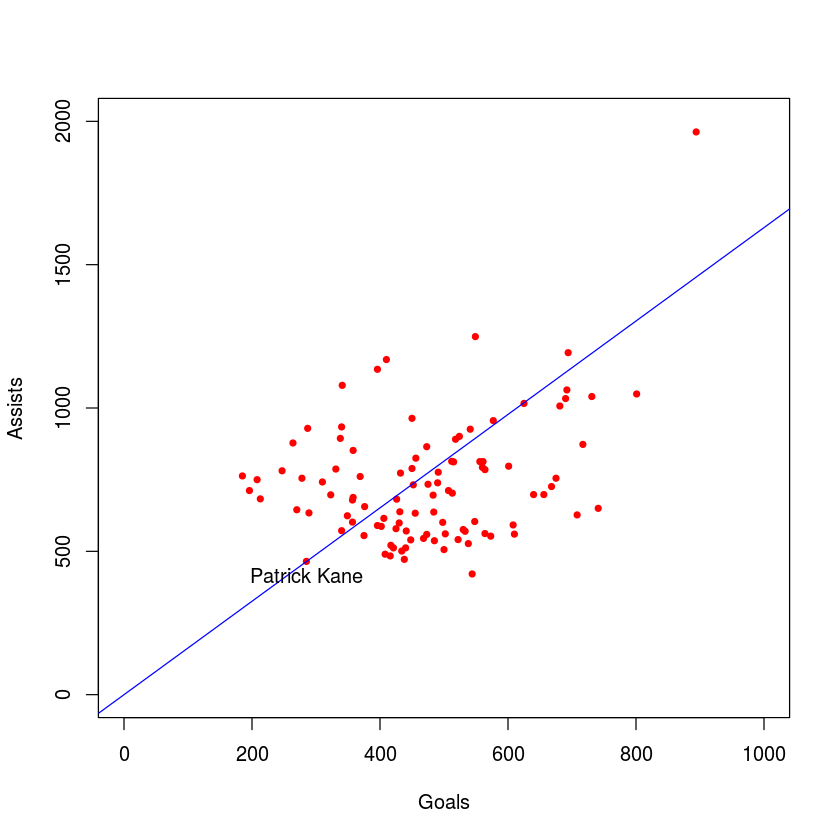

In [812]:
plot(modifiedInputData$A ~ modifiedInputData$G, pch=20,col='red',xlab="Goals",ylab="Assists",xlim=c(0,1000),ylim=c(0,2000))
shiftedModel1O <- lm(I(A-0) ~ I(G-50)+0,data=modifiedInputData)
slopeShiftedModel <- coef(shiftedModel1O)
slopeShiftedModel
wgY/wgX
interceptShiftedModel <- wgY-(slopeShiftedModel*wgX)
abline(0,slopeShiftedModel,col='blue')
with(subset(modifiedInputData,Player=="Patrick Kane"),text(wgX,wgY-50,"Patrick Kane"))

In [813]:
summary(modelO)
summary(shiftedModelO)
summary(shiftedModel1O)


Call:
lm(formula = I(A - 0) ~ I(G) + 0, data = modifiedInputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-447.30 -137.15    3.59  157.86  639.13 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
I(G)  1.48083    0.04977   29.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(A - 0) ~ I(G - 185) + 0, data = modifiedInputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-565.03  -76.91   72.48  265.61  763.00 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 185)   2.1853     0.1015   21.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 326.1 on 100 degrees of freedom
Multiple R-squared:  0.8226,	Adjusted R-squared:  0.8209 
F-statistic: 463.8 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(A - 0) ~ I(G - 50) + 0, data = modifiedInputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-475.89 -124.67   17.21  175.78  604.86 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
I(G - 50)  1.62936    0.05809   28.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 260 on 100 degrees of freedom
Multiple R-squared:  0.8872,	Adjusted R-squared:  0.8861 
F-statistic: 786.6 on 1 and 100 DF,  p-value: < 2.2e-16


In [814]:
resultsSummary <- data.frame(c("Initial Fit","Fit forced through Wayne Gretzky","Fit forced through Patrick Kane","Initial Fit through Origin","Fit forced through Wayne Gretzky through Origin","Fit forced through Patrick Kane through Origin"),c(glance(model)$r.squared,glance(shiftedModel)$r.squared,glance(shiftedModel1)$r.squared,glance(modelO)$r.squared,glance(shiftedModelO)$r.squared,glance(shiftedModel1O)$r.squared),c(glance(model)$p.value,glance(shiftedModel)$p.value,glance(shiftedModel1)$p.value,glance(modelO)$p.value,glance(shiftedModelO)$p.value,glance(shiftedModel1O)$p.value))
resultsSummary <- rename(resultsSummary,c("c..Initial.Fit....Fit.forced.through.Wayne.Gretzky....Fit.forced.through.Patrick.Kane..."="Model", "c.glance.model..r.squared..glance.shiftedModel..r.squared..glance.shiftedModel1..r.squared.."="R-Squared value","c.glance.model..p.value..glance.shiftedModel..p.value..glance.shiftedModel1..p.value.."="P-value"))

Summary of results for different models

In [815]:
resultsSummary

,Model,R-Squared value,P-value
1,Initial Fit,0.10823050447434,0.000831716923854345
2,Fit forced through Wayne Gretzky,0.909145627591712,2.298259679506e-53
3,Fit forced through Patrick Kane,0.573181712694336,3.39424539724717e-20
4,Initial Fit through Origin,0.898522390244664,1.74631174008189e-51
5,Fit forced through Wayne Gretzky through Origin,0.822643019130298,2.4252121409589e-39
6,Fit forced through Patrick Kane through Origin,0.887215065852555,3.45823723154574e-49


# Interpretation of the results

1. From the above table it can be seen that the R-squared value for the initial fit without any tweaking is least and the model does not seem to be a good fit.
2. When the model is forced to pass through Wayne Gretzky the RSquare approaches 1 , which is one of the parameters for a good fit.
3. When the models are forced through origin, all the three models seem to perform equally good.  